In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/shruthichitra/Downloads/insurance - insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


                             UNIVARIATE ANALYSIS

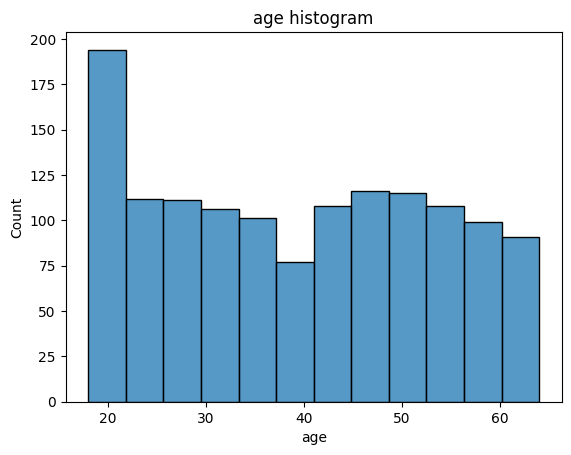

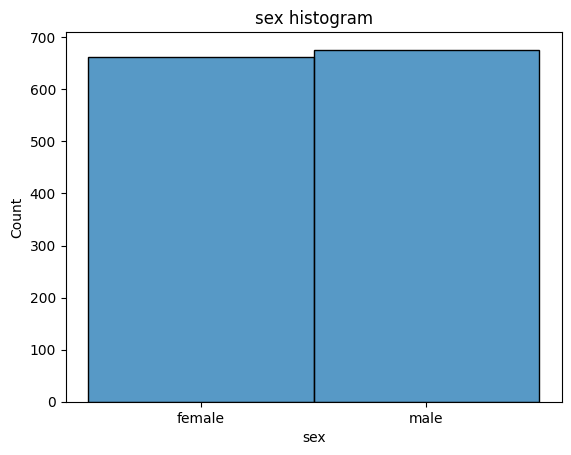

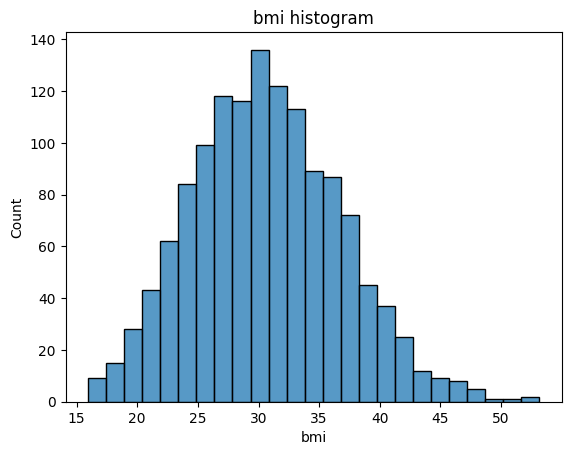

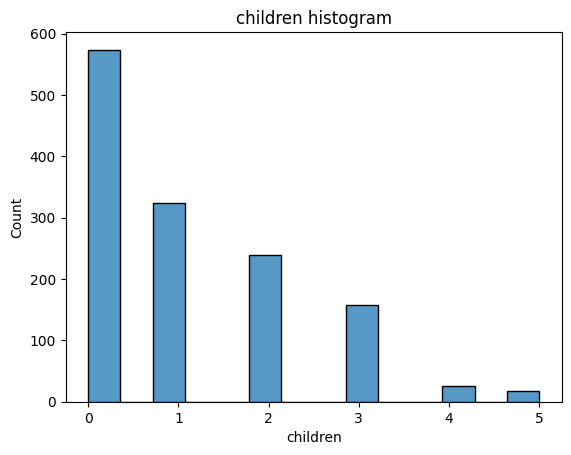

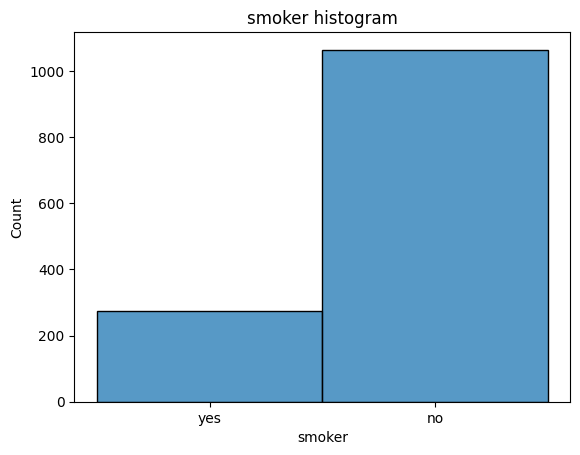

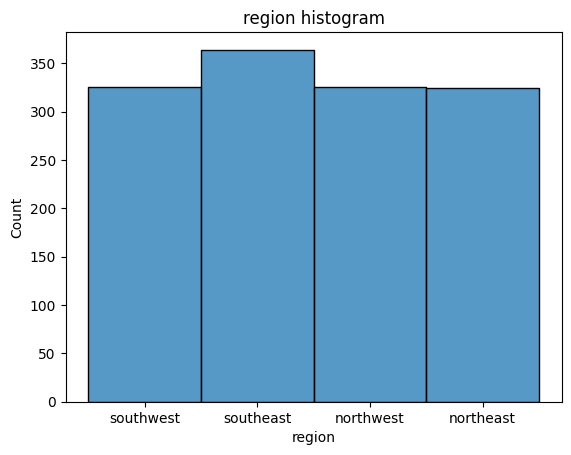

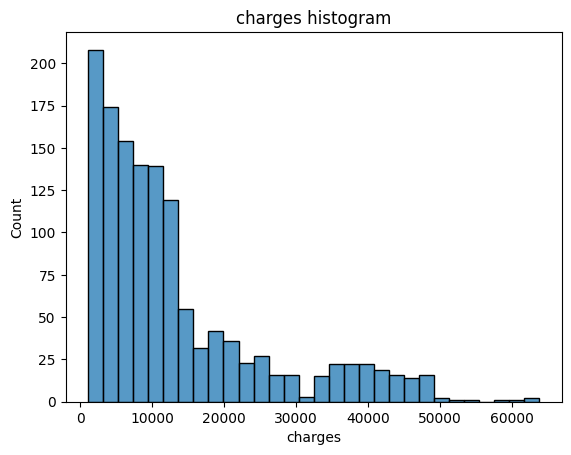

In [11]:
for col in df.columns:
  fig, ax = plt.subplots()
  plt.title(f'{col} histogram')
  sns.histplot(data=df, x=col, ax=ax)
  plt.show()

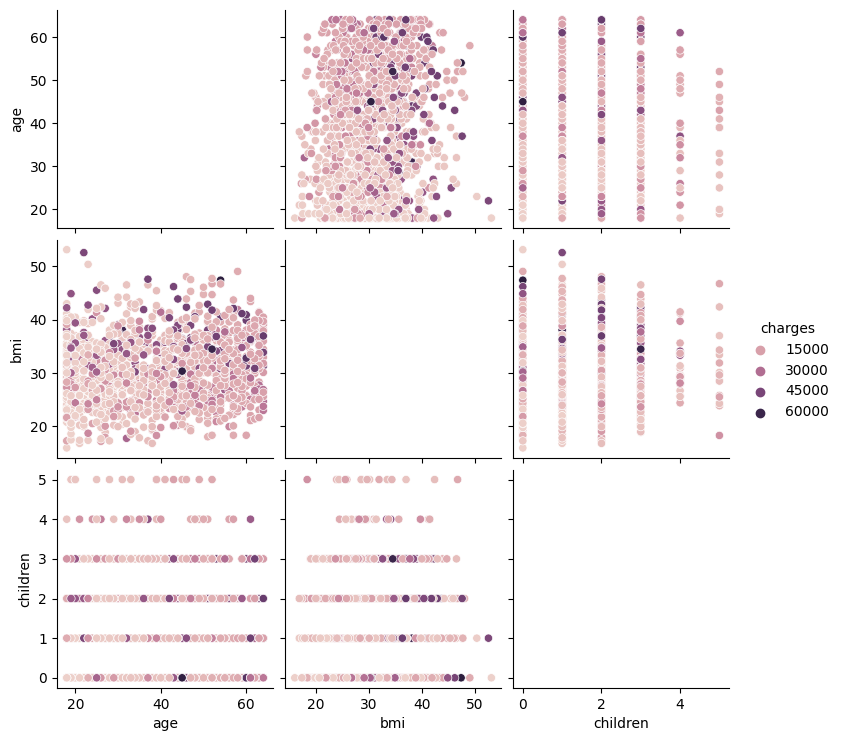

In [8]:
##multivarite
sns.pairplot(df,hue="charges")

                  heatmap

C:\Users\shruthichitra\AppData\Local\Temp\ipykernel_11020\1156892343.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmin=1,vmax=1,annot=True)


<AxesSubplot: >

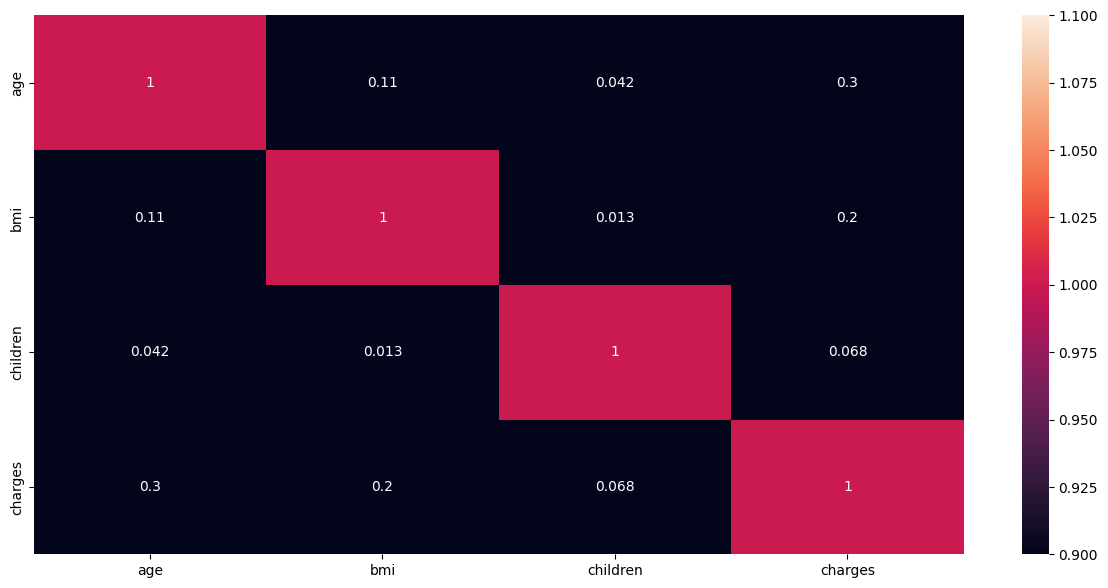

In [12]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),vmin=1,vmax=1,annot=True)

                                           CONVERTING CATEGORICAL INTO NUMERICAL

In [15]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df["sex"]= label_encoder.fit_transform(df["sex"])
df["region"]= label_encoder.fit_transform(df["region"])
df["smoker"]= label_encoder.fit_transform(df["smoker"])

df['sex'].unique()

array([0, 1], dtype=int64)

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [17]:
from sklearn.model_selection import train_test_split


In [18]:
Y = df.charges
df.drop('charges', axis=1, inplace=True)
X = np.asarray(df)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size= 0.20, random_state=42)


In [19]:
from sklearn.preprocessing import RobustScaler


In [20]:
rs = RobustScaler()
X_Train = rs.fit_transform(X_Train)
X_Test = rs.fit_transform(X_Test)


In [21]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import statsmodels.api as sm

In [22]:
Model = linear_model.LinearRegression()
Model.fit(X_Train, Y_Train)


LinearRegression()

In [27]:
print('Model intercept: ', Model.intercept_)
print('Model coeff: ', Model.coef_)

Model intercept:  8214.806156864684
Model coeff:  [ 6.16935033e+03 -1.87914567e+01  2.78404829e+03  8.50182912e+02
  2.36478181e+04 -2.71284266e+02]


                                mean score of the model at 95% confidence level

In [28]:
y_pred = Model.predict(X_Test)
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(Model, X_Train, Y_Train, cv=5, scoring='r2')
print(cross_val)


[0.71605226 0.80286251 0.72459593 0.65909301 0.76711092]


In [33]:
Model.score(X_Train, Y_Train)


0.7417049283233981

In [34]:
Model.score(X_Test, Y_Test)


0.7827494810875837

In [25]:
Y_Pred = Model.predict(X_Test)
Y_Test_Pred = pd.DataFrame({"Y_Test": Y_Test, "Y_Pred": Y_Pred})
Y_Test_Pred.head()


,Y_Test,Y_Pred
764,9095.06825,9152.214304
887,5272.17580,7298.798889
890,29330.98315,37120.831220
1293,9301.89355,9730.351964
259,33750.29180,27178.087923


THEREFORE THE MODEL IS GIVING 74% ACCURACY AND BY SEEING THE VALUES OF Y_TEST AND T_PRED IT IS PREDICATING REASONABLE VALUES